In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha for Bonferroni Correction
alpha =  0.003/30

# zTest Function
# requires original dataframe (df), group 1 (df1), group2 (df2), variable to be tested (column), alpha for confidence intervals (alpha)
def zTest(df,df1,df2,column, alpha):
    #use stats models ztests on the two groups
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    # print if the means are significantly different
    if p<= alpha:
        print('***The Groups Have Different Means***')
    
    # print probability of groups sharing a mean
    print('Probablility They Have Same Mean: ', round(p,5))
    
    # print confidence interval
    t = smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha)
    print('Range of True Difference in Means: (',round(t[0],3),':', round(t[1],3),')')

# list diffence function that returns items in first list that are not in second list 
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]


In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')

# create dictionary to change binary categorical output variable to an integer
dic={'Sale':1.0,'No Sale':0.0}

# convert categorical output variable to binary
df['ResultOfTour']=df['ResultOfTour'].replace(dic)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15761 entries, 146456 to 384973
Data columns (total 15 columns):
?TourContractGeneration       15761 non-null int64
?TourGeneration               15761 non-null int64
Age                           15761 non-null int64
AgentLine                     15761 non-null object
BookingWindow                 15761 non-null object
FirstGenVsOwner               15761 non-null object
HHIncomeRanges                15761 non-null object
Homeowner                     15761 non-null object
InState                       15761 non-null object
Programs (Budget)             15761 non-null object
relationStatus                15761 non-null object
ResultOfTour                  15761 non-null float64
TourSeason                    15761 non-null object
WeekdayOrWeekend              15761 non-null object
NetVolumePlusNonGoodVolume    15761 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 1.9+ MB
None


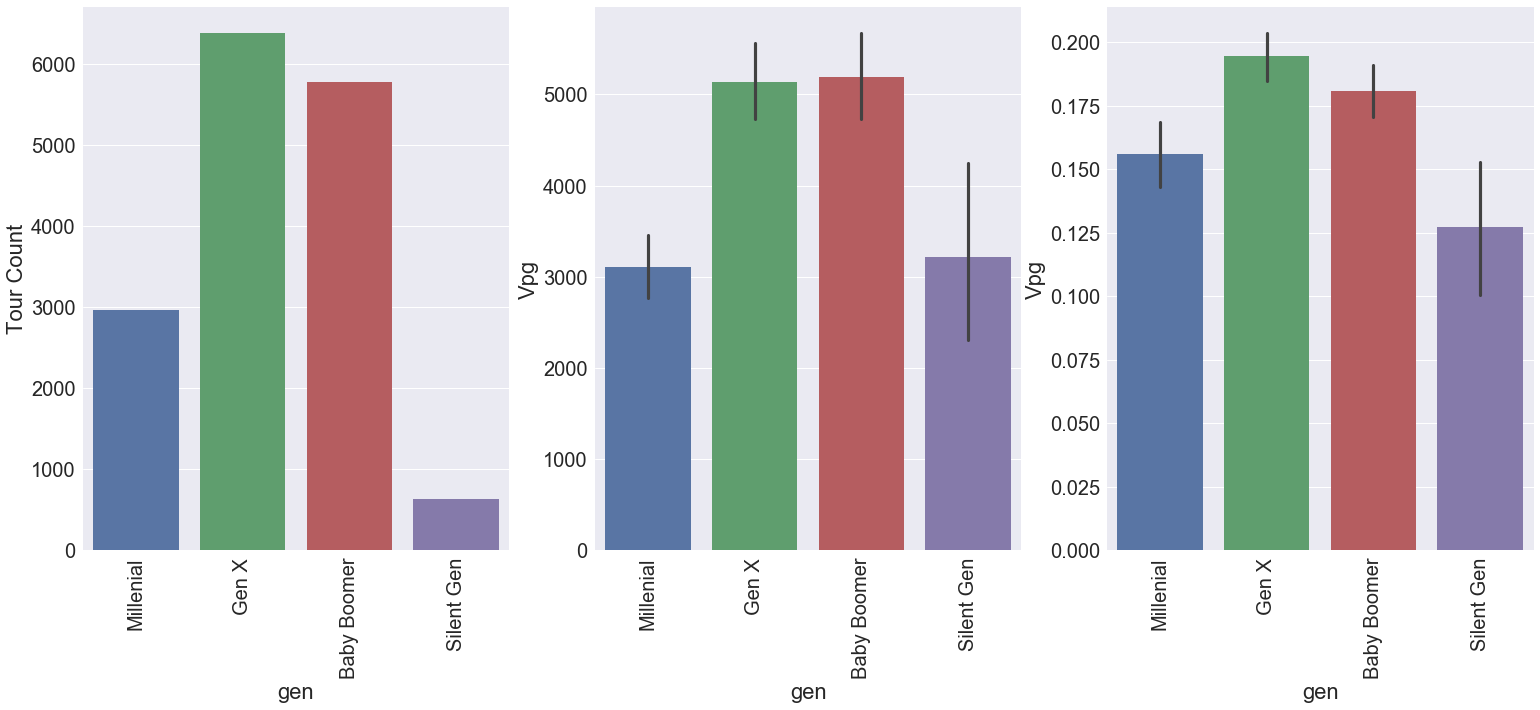

Millenials vs Other Generations Differences in VPG:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3239.132 : -686.758 )

Millenials vs Other Generations Differences in Close Rate:
Probablility They Have Same Mean:  0.00021
Range of True Difference in Means: ( -0.059 : 0.001 )

---------------------------------------------------------------------
Gen X vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.00494
Range of True Difference in Means: ( -282.407 : 1752.152 )

Gen X vs Other Generations Differences in Close Rate:
***The Groups Have Different Means***
Probablility They Have Same Mean:  5e-05
Range of True Difference in Means: ( 0.001 : 0.049 )

---------------------------------------------------------------------
Baby Boomers vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.00322
Range of True Difference in Means: ( -251.956 : 1821.145 )

Baby Boomers vs Oth

In [5]:
# create generation bins
age_dic = dict([(n, 'Millenial')for n in range(20, 38)] +
[(n, 'Gen X')for n in range(38, 54)] +
[(n, 'Baby Boomer')for n in range(54, 73)] +
[(n, 'Silent Gen')for n in range(73, 91)])
df['gen'] = df.Age.replace(age_dic)

#increase  figure size
mpl.rcParams['figure.figsize'] = (26,10)
sns.set(font_scale = 2)

#create countplot of number of tours for each generation
plt.subplot(1,3,1)
sns.countplot(x= 'gen',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by generation
plt.subplot(1,3,2)
sns.barplot(x= 'gen',y= 'NetVolumePlusNonGoodVolume',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Vpg')

#create barplot of close rate by generation
plt.subplot(1,3,3)
sns.barplot(x= 'gen',y= 'ResultOfTour',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Vpg')
plt.show()

#create millenial and non millenial groups
dfMillenials = df[df.Age < 38]
dfNotMillenials = df[df.Age >= 38]

#compare millenial and non millenial groups with z test
print('Millenials vs Other Generations Differences in VPG:')
zTest(df,dfMillenials,dfNotMillenials, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Millenials vs Other Generations Differences in Close Rate:')
zTest(df,dfMillenials,dfNotMillenials, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#create genx and non genx groups with z test
dfGenX = df[(df.Age >= 38) & (df.Age < 54 )]
dfNotGenX = df[(df.Age < 38) | (df.Age >= 54)]

#compare genx and non genx groups
print('Gen X vs Other Generations Differences in VPG:')
zTest(df,dfGenX,dfNotGenX, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Gen X vs Other Generations Differences in Close Rate:')
zTest(df,dfGenX,dfNotGenX, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Baby Boomer and non Baby Boomer groups
dfBB = df[(df.Age >= 54) & (df.Age < 73 )]
dfNotBB = df[(df.Age < 54) | (df.Age >= 73)]

# compare Baby Boomer and non Baby Boomer groups with z test
print('Baby Boomers vs Other Generations Differences in VPG:')
zTest(df,dfBB,dfNotBB, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Baby Boomers vs Other Generations Differences in Close Rate:')
zTest(df,dfBB,dfNotBB, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Silent Gen and non Silent Gen groups
dfSG = df[(df.Age >= 73) ]
dfNotSG = df[(df.Age < 73)]

# compare Silent Gen and non Silent Gen groups with z test
print('Silent Gen vs Other Generations Differences in VPG:')
zTest(df,dfSG,dfNotSG, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Silent Gen vs Other Generations Differences in Close Rate:')
zTest(df,dfSG,dfNotSG, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

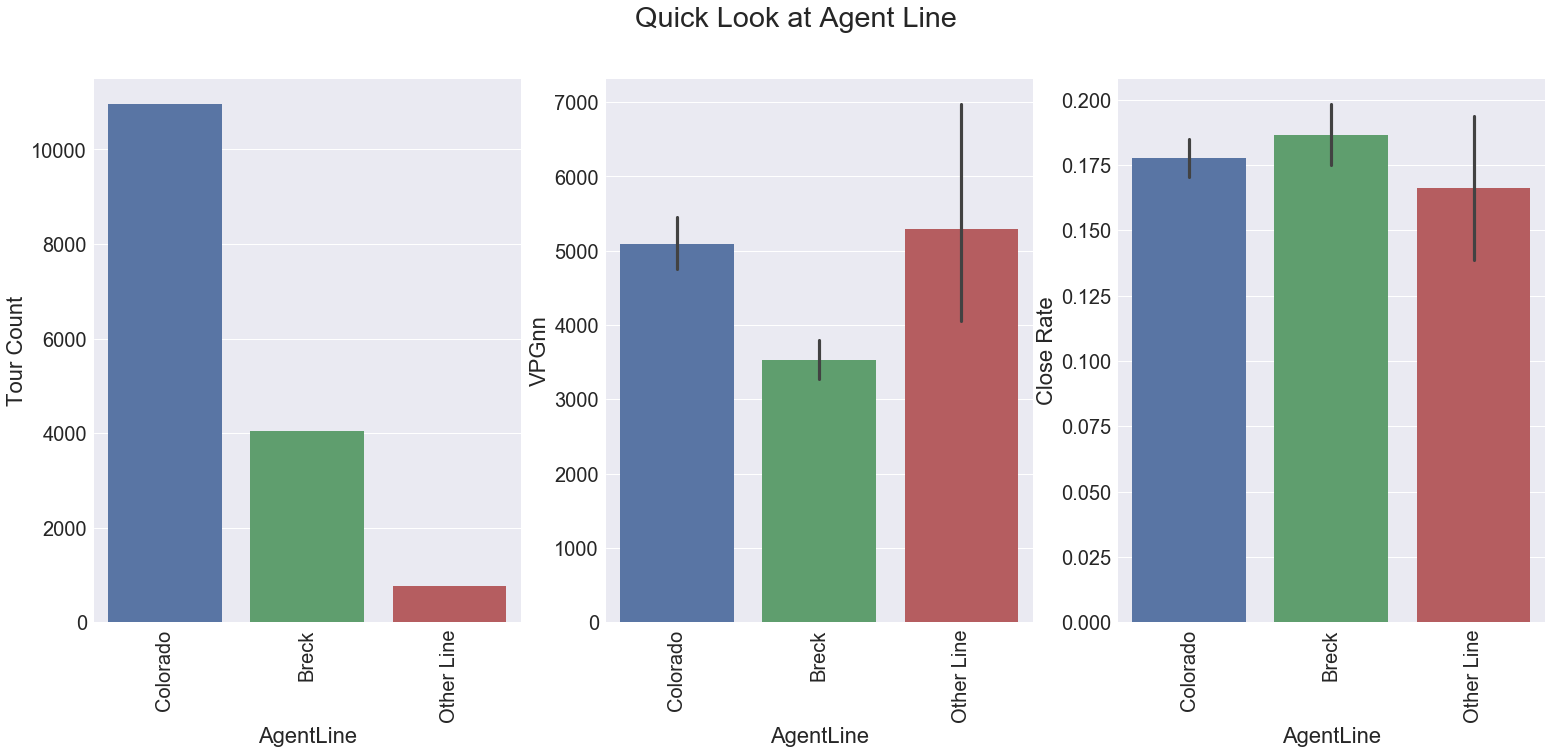

Colorado vs Breck and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 188.478 : 2356.68 )

Colorado vs Breck and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.42337
Range of True Difference in Means: ( -0.031 : 0.021 )

---------------------------------------------------------------------
Breck vs Colorado and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -2708.991 : -423.915 )

Breck vs Colorado and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.18577
Range of True Difference in Means: ( -0.018 : 0.036 )
---------------------------------------------------------------------


In [6]:
# create countplot of tours by agent line
plt.subplot(1,3,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by agent line
plt.subplot(1,3,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by agent line
plt.subplot(1,3,3)
sns.barplot(x= 'AgentLine', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Agent Line')
plt.show()

# create Colorado Line and Other Line groups
dfColorado = df[df.AgentLine == 'Colorado']
dfNotColorado = df[(df.AgentLine == 'Breck') | (df.AgentLine == 'Other Line')]

# compare Colorado Line and Other Line groups with z tests
print('Colorado vs Breck and Other Lines Differences in VPG')
zTest(df,dfColorado,dfNotColorado, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Colorado vs Breck and Other Lines Differences in Close Rate')
zTest(df,dfColorado,dfNotColorado, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Breck Line and Other Line groups
dfBreck = df[df.AgentLine == 'Breck']
dfNotBreck = df[(df.AgentLine == 'Colorado') | (df.AgentLine == 'Other Line')]

# compare Breck Line and Other Line groups with z tests
print('Breck vs Colorado and Other Lines Differences in VPG')
zTest(df,dfBreck,dfNotBreck, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Breck vs Colorado and Other Lines Differences in Close Rate')
zTest(df,dfBreck,dfNotBreck, 'ResultOfTour', alpha)
print('---------------------------------------------------------------------')

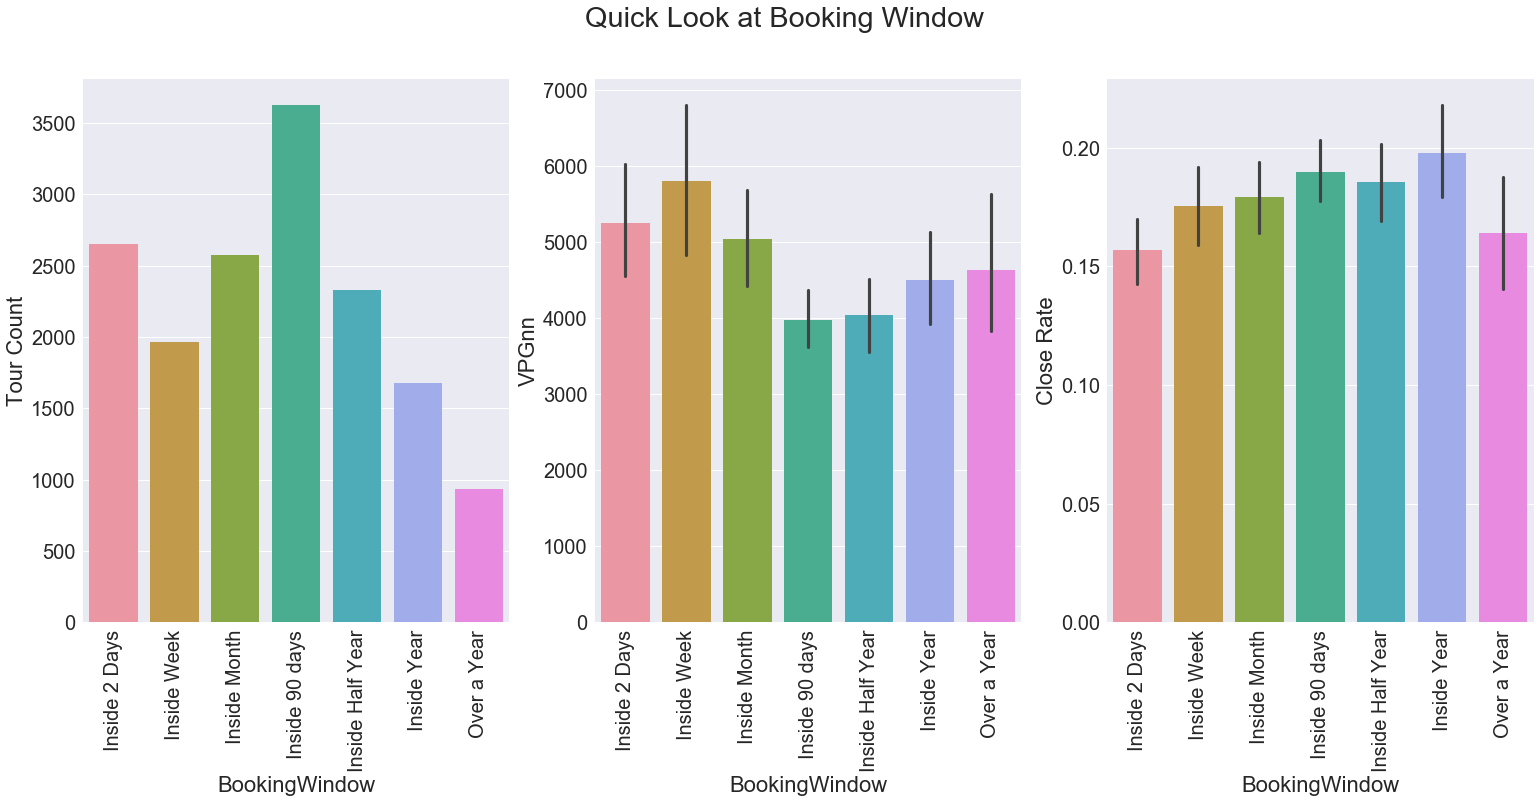

Booked Inside a Week vs Booked Ouside a Week Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  7e-05
Range of True Difference in Means: ( 19.467 : 2213.485 )

Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate
Probablility They Have Same Mean:  0.00199
Range of True Difference in Means: ( -0.047 : 0.005 )

---------------------------------------------------------------------
Booked Inside a Month vs Booked Ouside a Month Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  1e-05
Range of True Difference in Means: ( 154.934 : 2159.608 )

Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate
Probablility They Have Same Mean:  0.00432
Range of True Difference in Means: ( -0.041 : 0.006 )

---------------------------------------------------------------------
Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG
Probablility They Have Same Mean:  0.04059
Range 

In [7]:
# create countplot of tour count by booking window
plt.subplot(1,3,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

# create barplot for vpg by booking window
plt.subplot(1,3,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

# create barplot for close rate by booking window
plt.subplot(1,3,3)
sns.barplot(x= 'BookingWindow',y = 'ResultOfTour', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Booking Window')
plt.show()

#Booked within a week Versus booked outside a week z test
dfInsideWeek = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')]
dfOutsideWeek = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')|(df.BookingWindow == 'Inside Month')]

print('Booked Inside a Week vs Booked Ouside a Week Differences in VPG')
zTest(df,dfInsideWeek,dfOutsideWeek, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate')
zTest(df,dfInsideWeek,dfOutsideWeek, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within a month Versus booked outside a month z test
dfInsideMonth = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')]
dfOutsideMonth = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

print('Booked Inside a Month vs Booked Ouside a Month Differences in VPG')
zTest(df,dfInsideMonth,dfOutsideMonth, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate')
zTest(df,dfInsideMonth,dfOutsideMonth, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within 90 days Versus booked outside 90 days z test
dfInside90 = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')|(df.BookingWindow == 'Inside 90 days')]
dfOutside90 = df[(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG')
zTest(df,dfInside90,dfOutside90, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in Close Rate')
zTest(df,dfInside90,dfOutside90, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

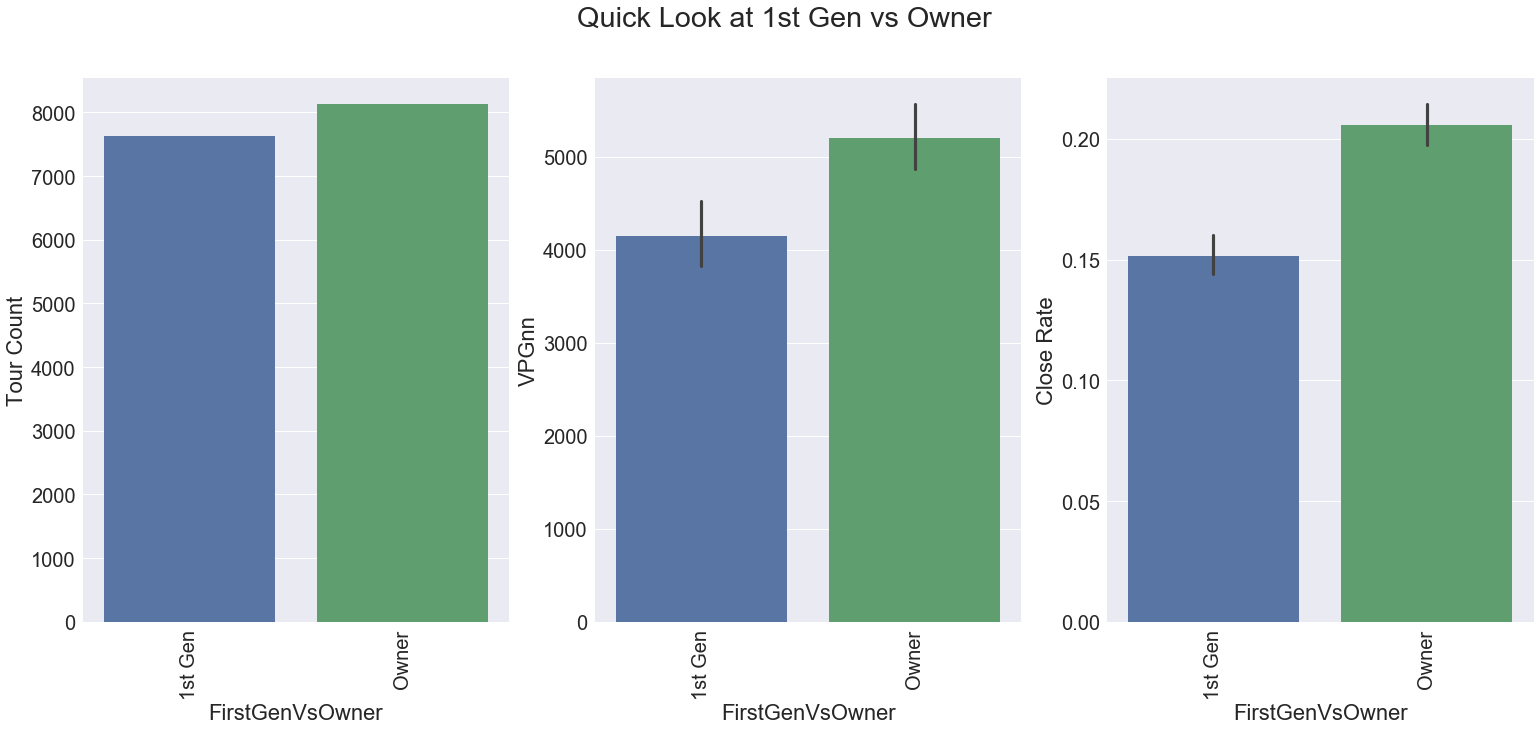

Owner Versus First Gen True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  4e-05
Range of True Difference in Means: ( 53.228 : 2051.461 )

Owner Versus First Gen True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.03 : 0.078 )

---------------------------------------------------------------------


In [8]:
# create countplot of tour count by first gen vs owner
plt.subplot(1,3,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by first gen vs owner
plt.subplot(1,3,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

# create barplot of close rate by first gen vs owner
plt.subplot(1,3,3)
sns.barplot(x= 'FirstGenVsOwner',y = 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in VPG')
zTest(df,dfOwner,dfFirstGen, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Owner Versus First Gen True Difference in Close Rate')
zTest(df,dfOwner,dfFirstGen, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

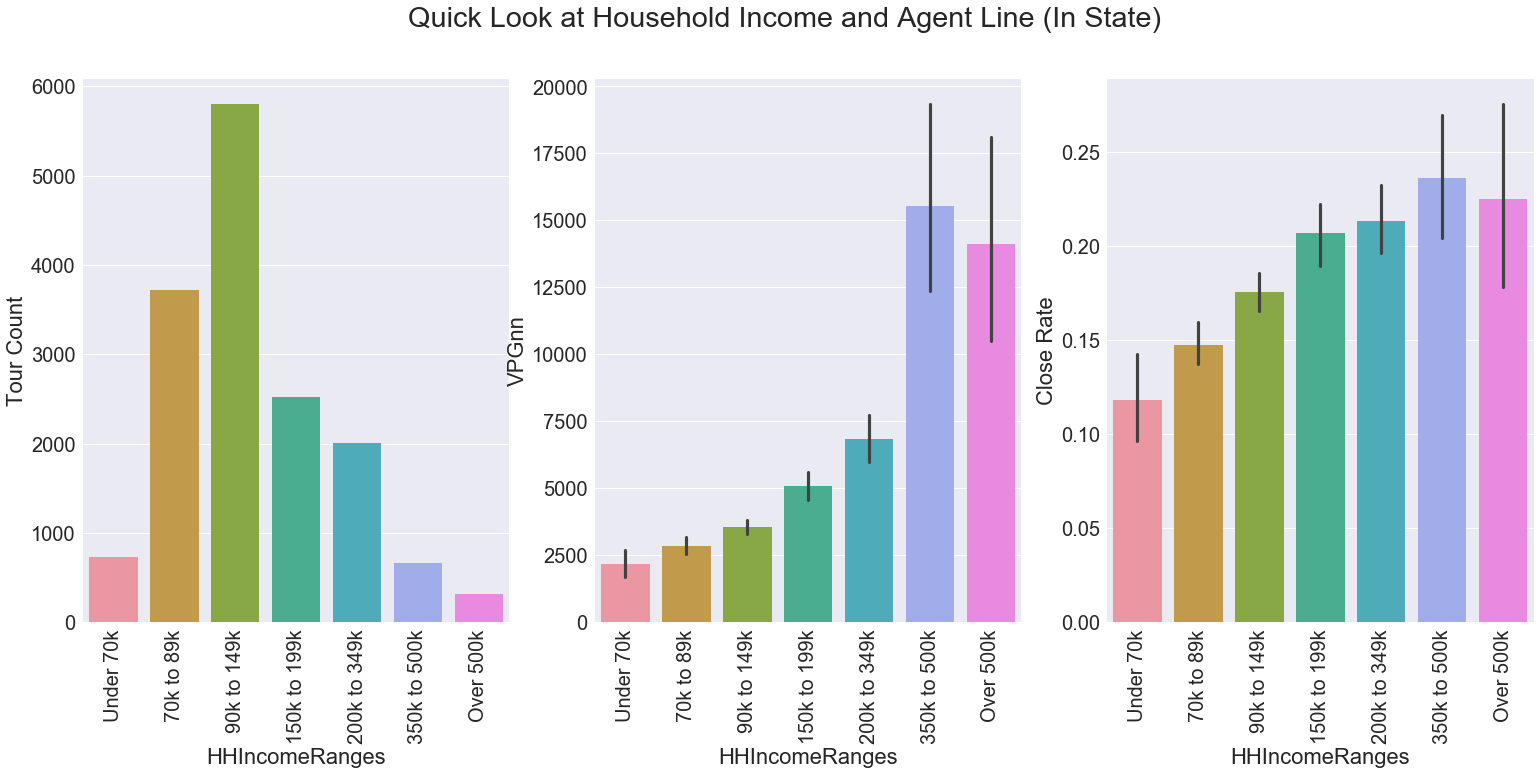

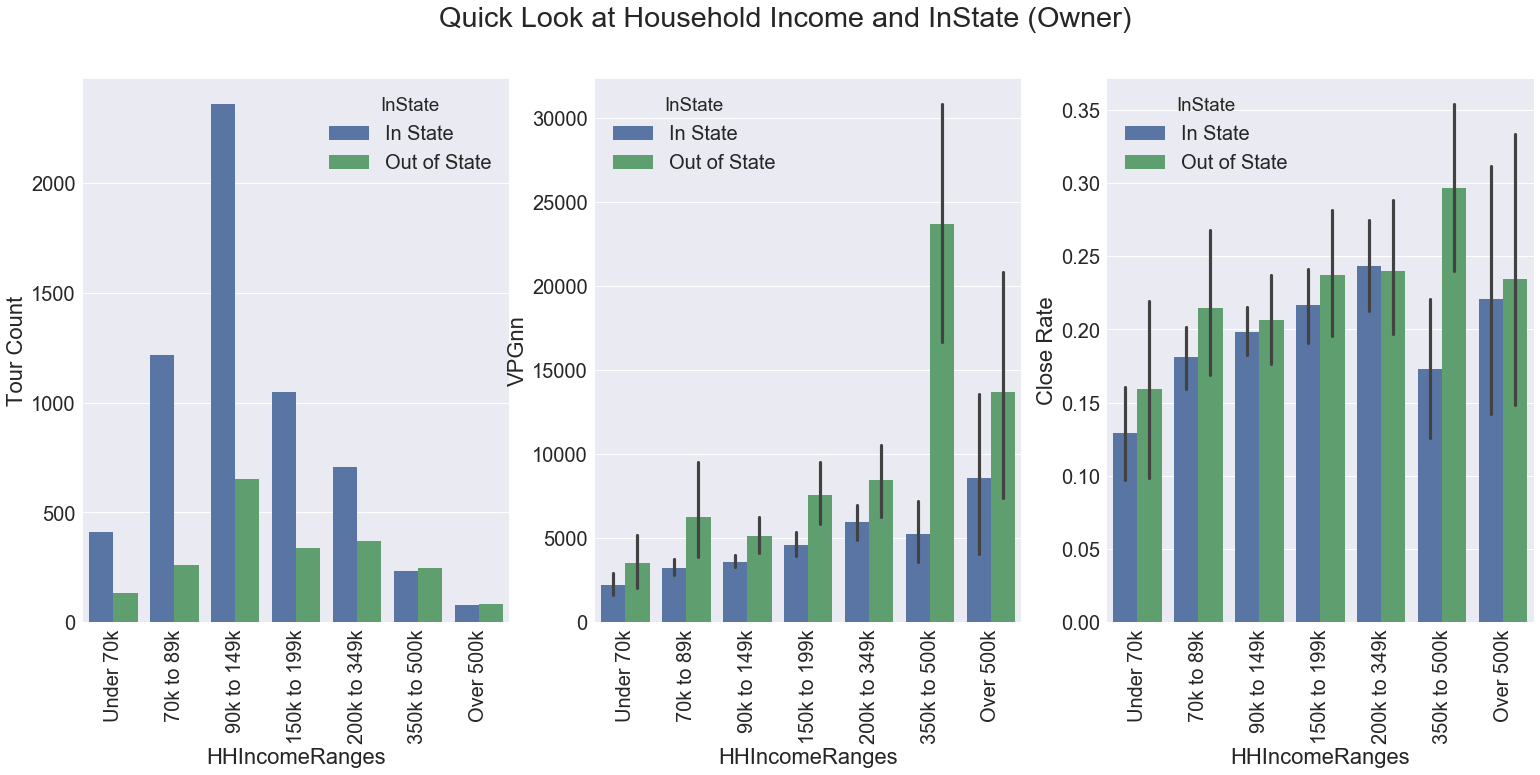

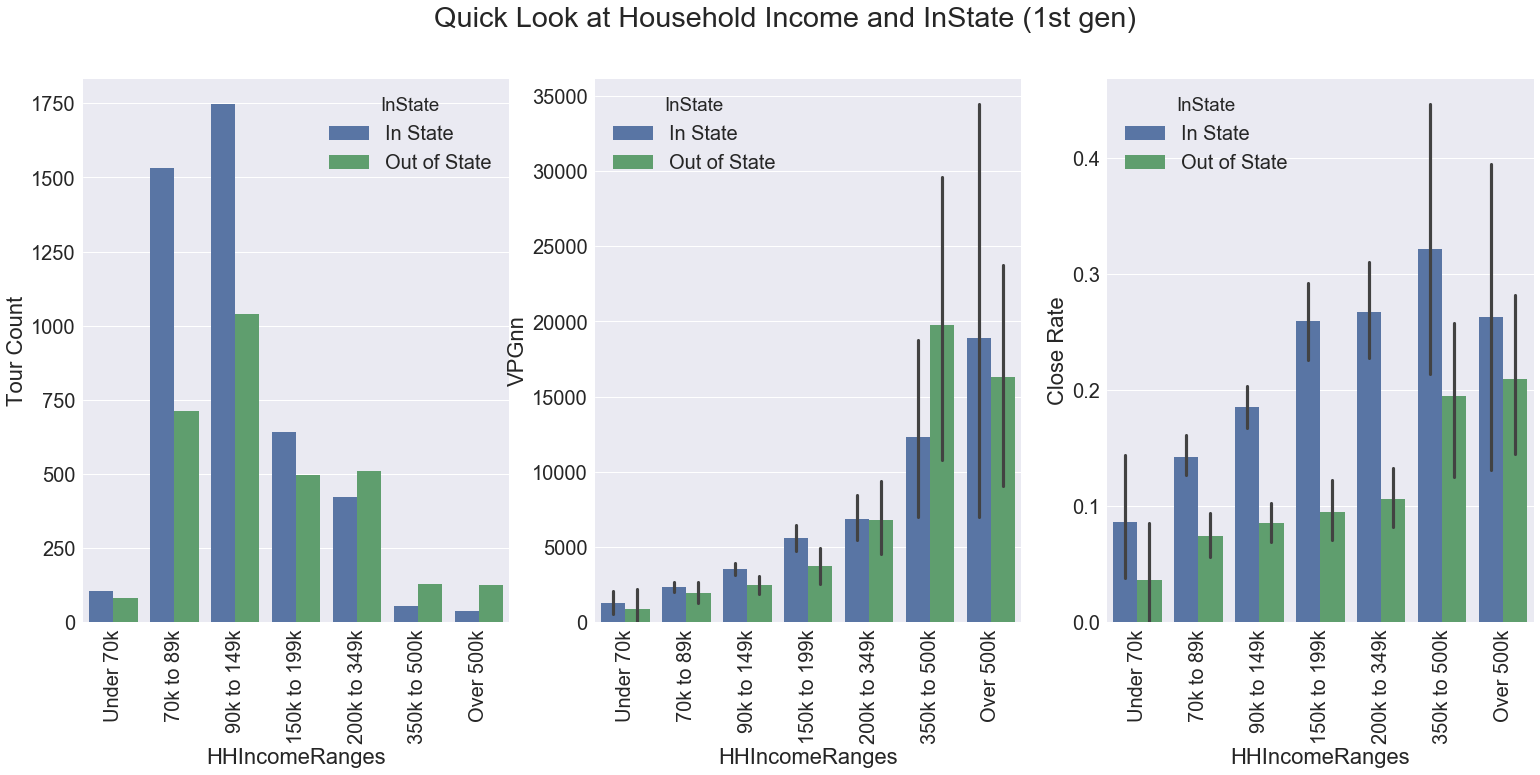

HHI over 350k vs HHI Under 350k Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 9016.519 : 13094.932 )

HHI over 350k vs HHI Under 350k Differences in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  1e-05
Range of True Difference in Means: ( 0.007 : 0.106 )

---------------------------------------------------------------------


In [9]:
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and Agent Line (In State)')
plt.show()

# Look at HHI Broken up by InState vs Out of State
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df[df.FirstGenVsOwner == 'Owner'],hue = 'InState', order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume',hue = 'InState', data = df[df.FirstGenVsOwner == 'Owner'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour',hue = 'InState', data = df[df.FirstGenVsOwner == 'Owner'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and InState (Owner)')
plt.show()

# Look at HHI Broken up by InState vs Out of State
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df[df.FirstGenVsOwner == '1st Gen'],hue = 'InState', order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume',hue = 'InState', data = df[df.FirstGenVsOwner == '1st Gen'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour',hue = 'InState', data = df[df.FirstGenVsOwner == '1st Gen'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and InState (1st gen)')
plt.show()


#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350 = df[(df.HHIncomeRanges == 'Under 70k')|(df.HHIncomeRanges == '70k to 89k')|(df.HHIncomeRanges == '90k to 149k')|(df.HHIncomeRanges == '150k to 199k')|(df.HHIncomeRanges == '200k to 349k')]
dfHHI350 = df[(df.HHIncomeRanges == '350k to 500k')|(df.HHIncomeRanges == 'Over 500k')]
print('HHI over 350k vs HHI Under 350k Differences in VPG')
zTest(df,dfHHI350,dfNotHHI350, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('HHI over 350k vs HHI Under 350k Differences in Close Rate')
zTest(df,dfHHI350,dfNotHHI350, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

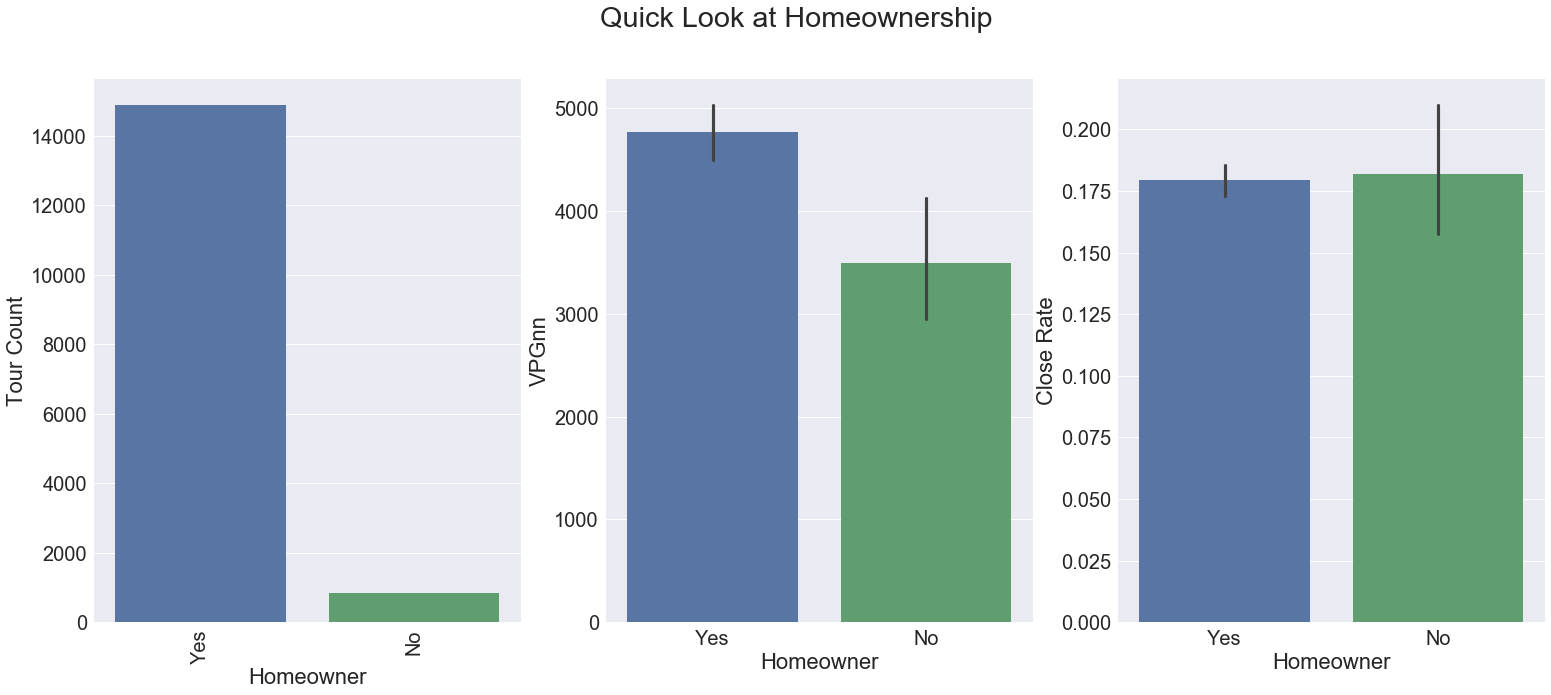

Homeowner Versus Non Homeowner True Difference in VPG
Probablility They Have Same Mean:  0.02468
Range of True Difference in Means: ( -931.216 : 3474.336 )

Homeowner Versus Non Homeowner True Difference in Close Rate
Probablility They Have Same Mean:  0.83837
Range of True Difference in Means: ( -0.055 : 0.05 )

---------------------------------------------------------------------


In [10]:
plt.subplot(1,3,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= df)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(y= 'ResultOfTour', x='Homeowner', data= df)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHY,dfHN, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Homeowner Versus Non Homeowner True Difference in Close Rate')
zTest(df,dfHY,dfHN, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

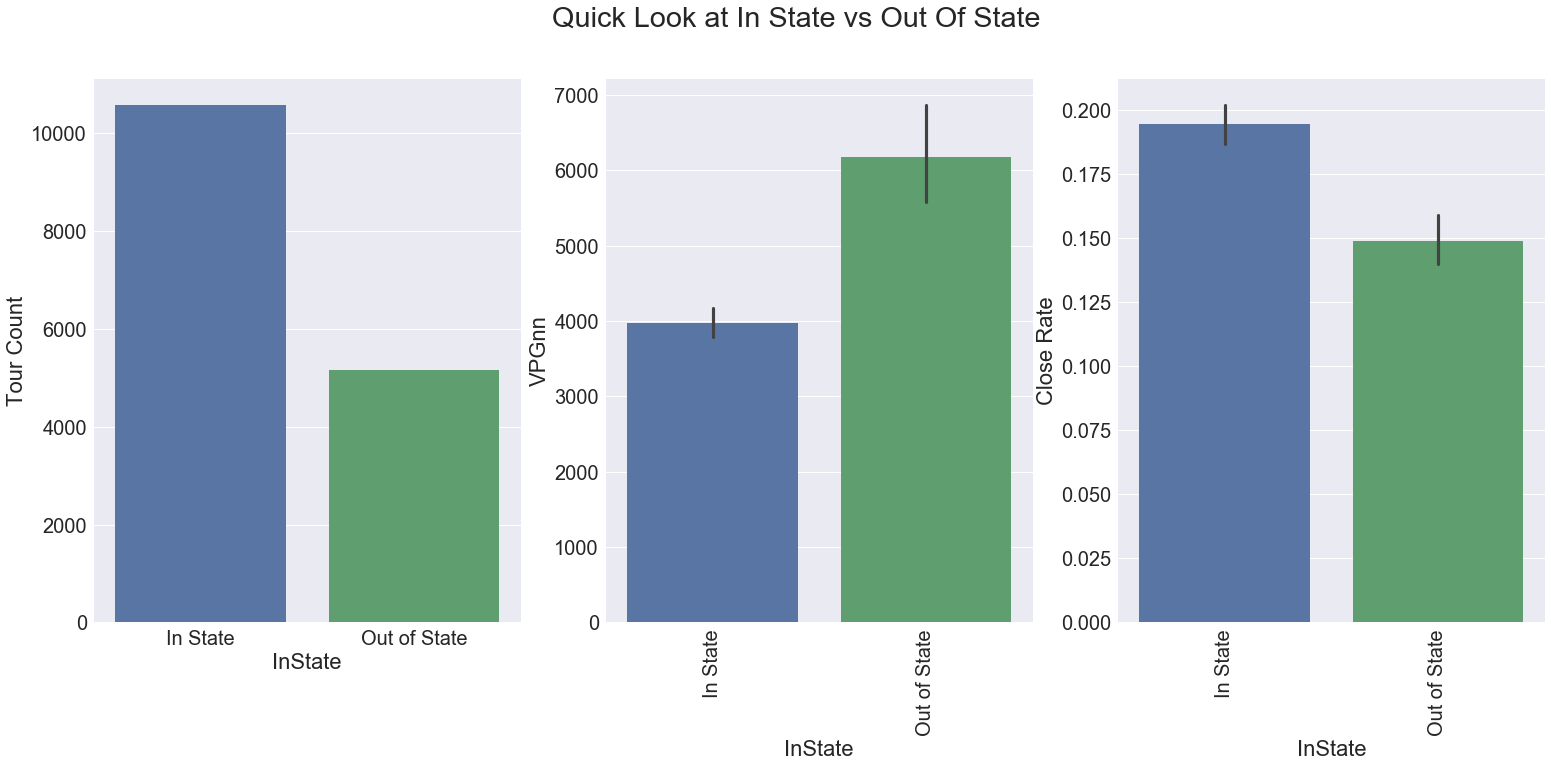

In State Versus Out of State True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3268.416 : -1144.689 )

In State Versus Out of State True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.02 : 0.071 )

---------------------------------------------------------------------


In [11]:
# instate quick look
plt.subplot(1,3,1)
sns.countplot(x= 'InState', data = df)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'InState', y='ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

print('In State Versus Out of State True Difference in VPG')
zTest(df,dfIn,dfOut, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('In State Versus Out of State True Difference in Close Rate')
zTest(df,dfIn,dfOut, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

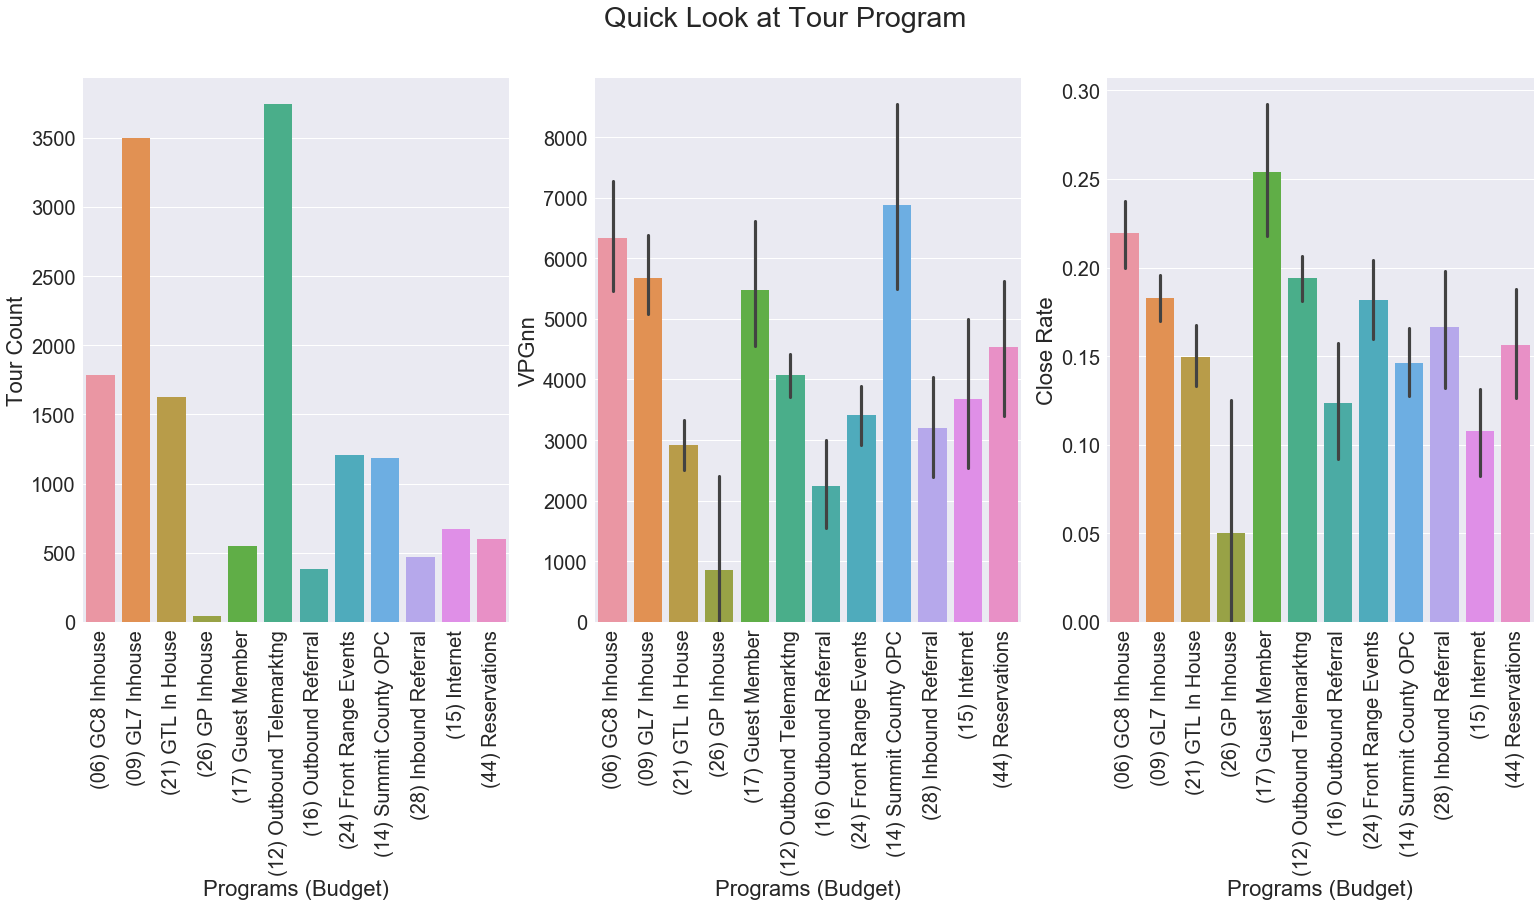

Inhouse programs  vs Non inhouse programs difference in vpg
Probablility They Have Same Mean:  0.00023
Range of True Difference in Means: ( -54.806 : 1944.944 )

Inhouse programs  vs Non inhouse programs difference in Close Rate
Probablility They Have Same Mean:  0.00312
Range of True Difference in Means: ( -0.006 : 0.042 )

---------------------------------------------------------------------


In [12]:
plt.subplot(1,3,1)
sns.countplot(x= 'Programs (Budget)', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'Programs (Budget)', y = 'ResultOfTour', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Program')
plt.show()

#Inhouse programs  vs Non inhouse differnce in vpg z test
dfInhouse = df[(df['Programs (Budget)']=='(06) GC8 Inhouse')|(df['Programs (Budget)']=='(21) GTL In House')|(df['Programs (Budget)']=='(26) GP Inhouse')|(df['Programs (Budget)']=='(09) GL7 Inhouse')|(df['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouse = df[(df['Programs (Budget)']=='(12) Outbound Telemarktng')|(df['Programs (Budget)']=='(16) Outbound Referral')|(df['Programs (Budget)']=='(24) Front Range Events')|(df['Programs (Budget)']=='(14) Summit County OPC')|(df['Programs (Budget)']=='(28) Inbound Referral')|(df['Programs (Budget)']=='(15) Internet')|(df['Programs (Budget)']=='(44) Reservations')]

print('Inhouse programs  vs Non inhouse programs difference in vpg')
zTest(df,dfInhouse,dfNotInhouse, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Inhouse programs  vs Non inhouse programs difference in Close Rate')
zTest(df,dfInhouse,dfNotInhouse, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

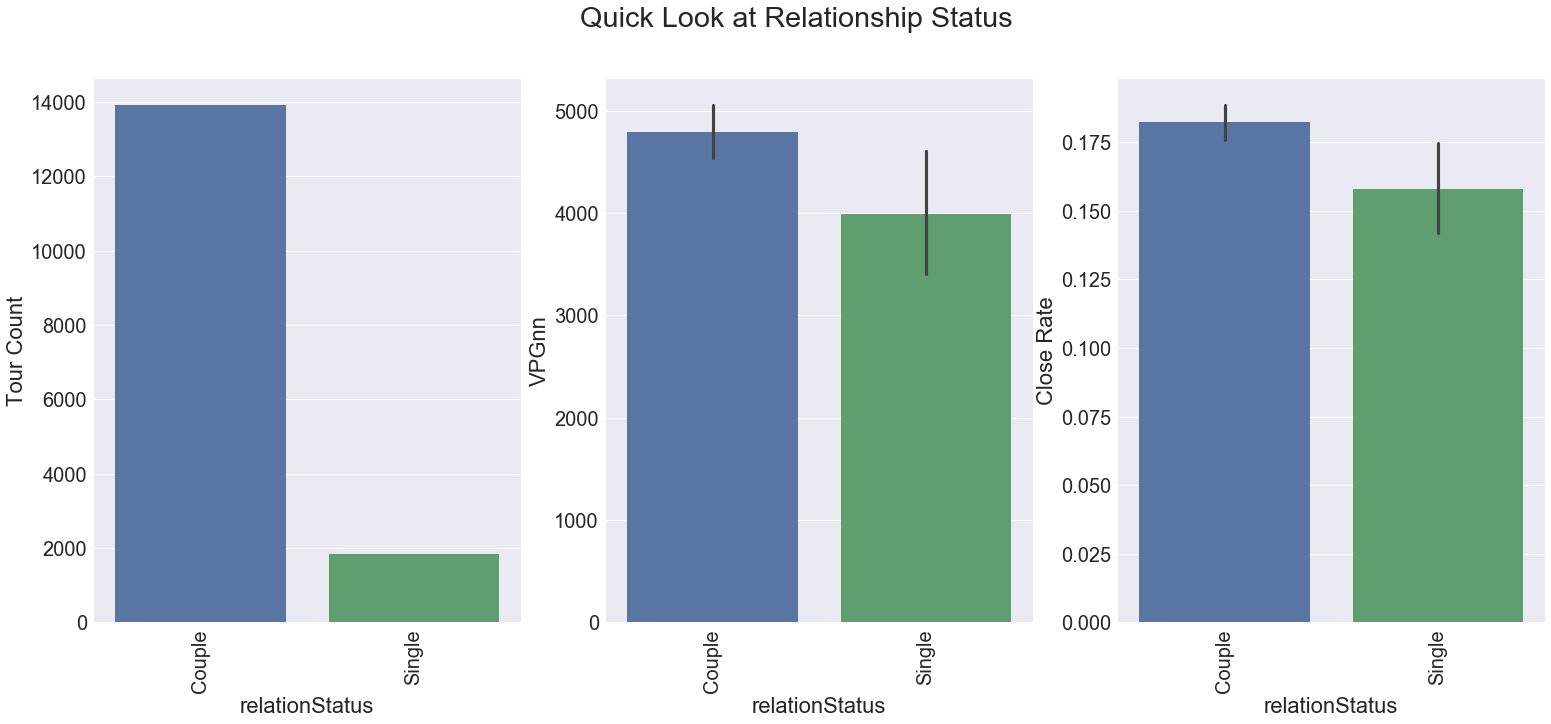

Couples Versus Singles Difference in VPG
Probablility They Have Same Mean:  0.04607
Range of True Difference in Means: ( -759.995 : 2358.465 )

Couples Versus Singles Difference in Close Rate
Probablility They Have Same Mean:  0.01075
Range of True Difference in Means: ( -0.013 : 0.061 )

---------------------------------------------------------------------


In [13]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'relationStatus', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

print('Couples Versus Singles Difference in VPG')
zTest(df,dfCouple,dfSingle, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Couples Versus Singles Difference in Close Rate')
zTest(df,dfCouple,dfSingle, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

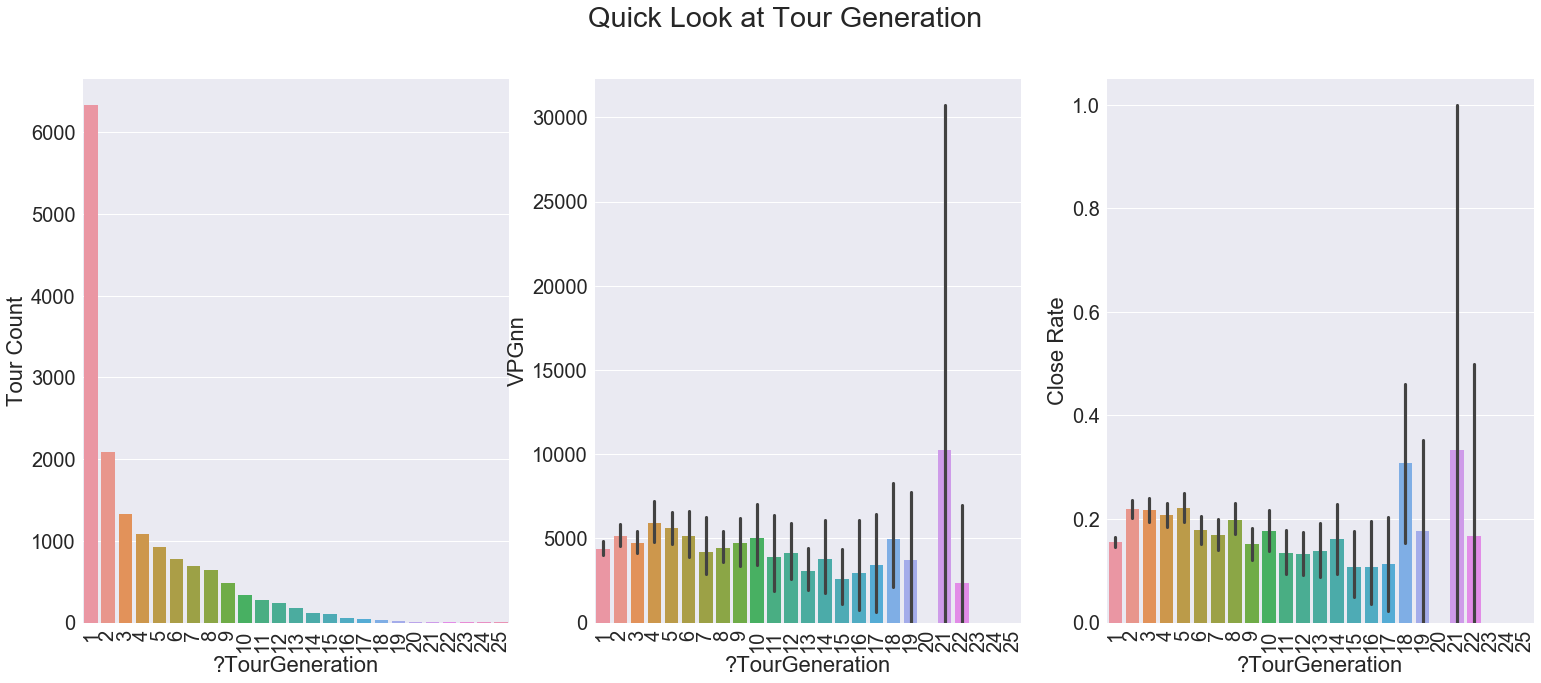

Under 5 Tour Vs Over 5 Tours Difference in VPG
Probablility They Have Same Mean:  0.68288
Range of True Difference in Means: ( -964.342 : 1190.561 )

Under 5 Tour Vs Over 5 Tours Difference in Close Rate
Probablility They Have Same Mean:  0.45277
Range of True Difference in Means: ( -0.021 : 0.031 )

---------------------------------------------------------------------


In [14]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= '?TourGeneration', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= '?TourGeneration', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= '?TourGeneration', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Generation')
plt.show()


#TourGeneration status z test
dfUnder5 = df[df['?TourGeneration']<5]
dfAbove5 = df[df['?TourGeneration']>=5]
             
print('Under 5 Tour Vs Over 5 Tours Difference in VPG')
zTest(df,dfUnder5,dfAbove5, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Under 5 Tour Vs Over 5 Tours Difference in Close Rate')
zTest(df,dfUnder5,dfAbove5, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')


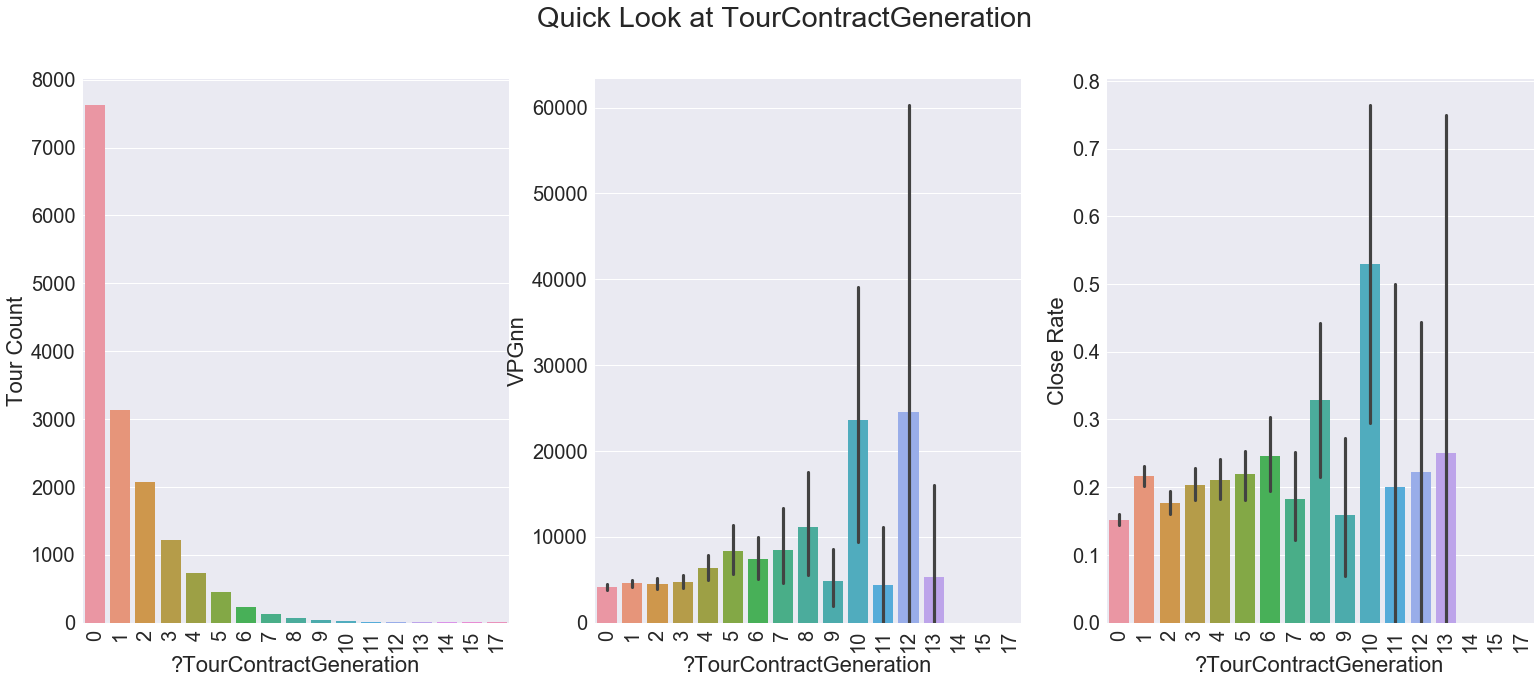

Under 3 Contracts Vs 3 or more Contracts Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3357.883 : -788.713 )

Under 3 Contracts Vs 3 or more Contracts Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.073 : -0.012 )

---------------------------------------------------------------------


In [15]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= '?TourContractGeneration', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= '?TourContractGeneration', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= '?TourContractGeneration', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at TourContractGeneration')
plt.show()


#TourContractGeneration status z test
dfUnder3C = df[df['?TourContractGeneration']<3]
dfAbove3C = df[df['?TourContractGeneration']>=3]
             
print('Under 3 Contracts Vs 3 or more Contracts Difference in VPG')
zTest(df,dfUnder3C,dfAbove3C, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Under 3 Contracts Vs 3 or more Contracts Difference in Close Rate')
zTest(df,dfUnder3C,dfAbove3C, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')


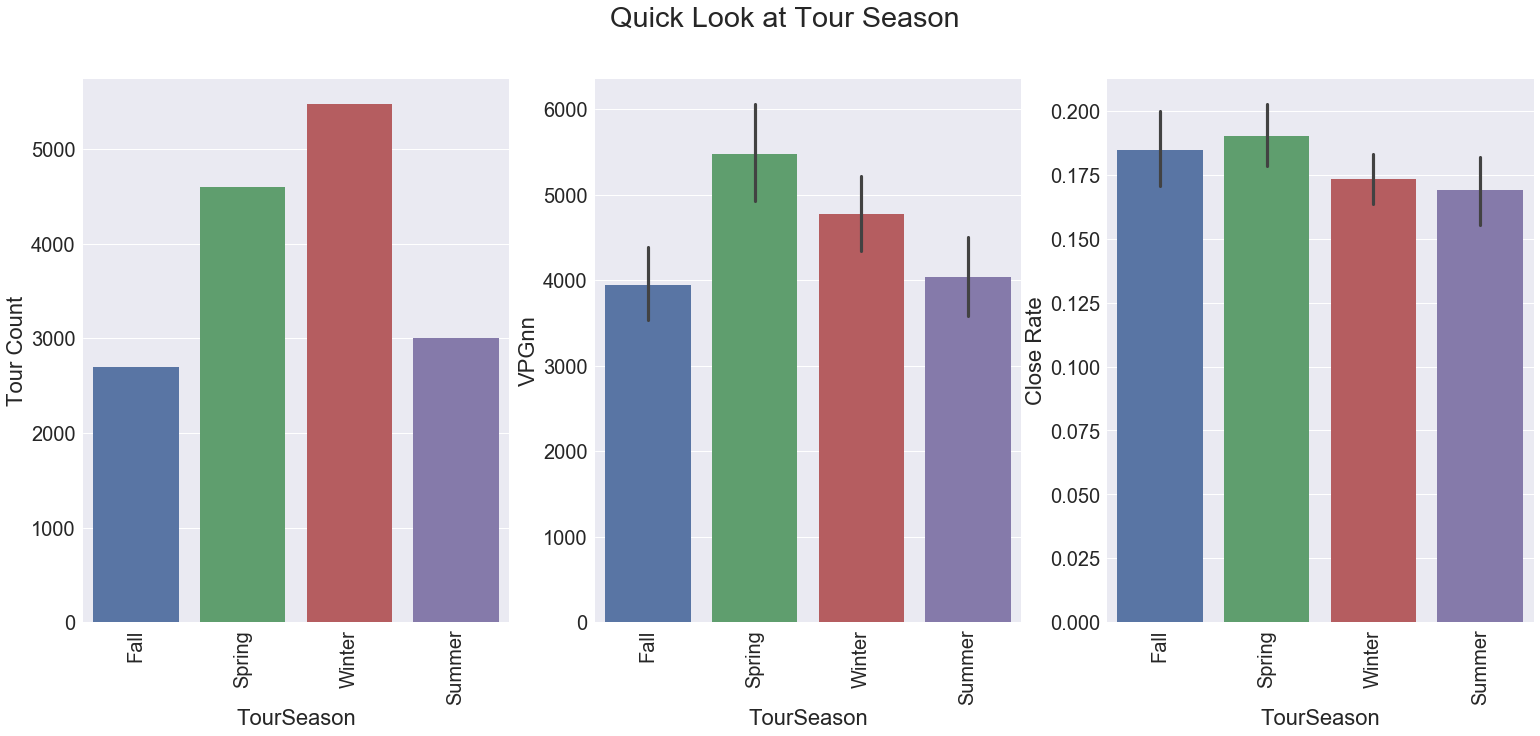

Winter/Spring Vs Summer/Fall Tours Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  4e-05
Range of True Difference in Means: ( 65.63 : 2144.373 )

Winter/Spring Vs Summer/Fall Tours Difference in Close Rate
Probablility They Have Same Mean:  0.46641
Range of True Difference in Means: ( -0.02 : 0.029 )

---------------------------------------------------------------------


In [16]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'TourSeason', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'TourSeason', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'TourSeason', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Season')
plt.show()


#Tour Season z test
dfWSp = df[(df['TourSeason']=='Winter')| (df['TourSeason']=='Spring')]
dfSF = df[(df['TourSeason']=='Summer')| (df['TourSeason']=='Fall')]
             
print('Winter/Spring Vs Summer/Fall Tours Difference in VPG')
zTest(df,dfWSp,dfSF, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Winter/Spring Vs Summer/Fall Tours Difference in Close Rate')
zTest(df,dfWSp,dfSF, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

